# Customer Credit Score Prediction Model

## Context

In today’s banking environment, the use of data science and machine learning techniques has become essential to increase both the accuracy and efficiency of credit risk assessment. Accurately predicting a customer’s credit score enables financial institutions to make safer and more personalized decisions in processes such as loan approvals, credit limit assignments and financing options.

This project proposes building a supervised machine learning pipeline aimed at predicting customer credit scores using demographic, financial and behavioral variables. The model's performance will also be evaluated with and without outliers to assess its robustness.

The credit score will be classified into three categories: Poor, Standard, and Good.

## Project Goals

- Build a preprocessing, modeling and evaluation pipeline to predict credit scores.
- Test multiple classification models and compare their performance.
- Identify the key features that influence customer credit scores.
- Generate insights to help the credit department improve its evaluation policies.
- Expand my knowledge in the field of Data Science.

## Description of the Data Used

The dataset used in this project contains demographic and financial information from customers of a banking institution. The data is structured around variables historically known to influence credit scoring.

Key variables include:

- `idade` – Customer's age  
- `salario_anual` – Declared annual income  
- `mix_credito` – Variety of credit account types an individual holds  
- `divida_total` – Total outstanding debt  
- `num_pagamentos_atrados` – Number of recent late payments  
- `idade_historico_credito` – Length of credit history (how long credit accounts like loans or credit cards have been open)  
- `juros_emprestimo` – Interest rate on the credit line  
- `dias_atraso` – Number of days past due  
- `score_credito` – Target variable: Credit score category (Poor, Standard, Good)

## Initial Expectations

- Variables such as income, payment history, and debt level are expected to have a strong impact on credit score.

- Tree-based models like Random Forest are anticipated to perform well and offer high interpretability.

- A detailed analysis of the confusion matrix and classification report will help evaluate not only overall accuracy but also the types of errors the model is making (false positives or false negatives).


### Importing the dataset

In [ ]:
import pandas as pd

tabela = pd.read_csv("clientes.csv")

display(tabela)

display(tabela.info()) # describes the column information from the dataframe.

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

None

In [2]:
print(tabela.columns) # viewing the columns present in the table.

Index(['id_cliente', 'mes', 'idade', 'profissao', 'salario_anual',
       'num_contas', 'num_cartoes', 'juros_emprestimo', 'num_emprestimos',
       'dias_atraso', 'num_pagamentos_atrasados', 'num_verificacoes_credito',
       'mix_credito', 'divida_total', 'taxa_uso_credito',
       'idade_historico_credito', 'investimento_mensal',
       'comportamento_pagamento', 'saldo_final_mes', 'score_credito',
       'emprestimo_carro', 'emprestimo_casa', 'emprestimo_pessoal',
       'emprestimo_credito', 'emprestimo_estudantil'],
      dtype='object')


### Plotting the correlation matrix of the features

<Axes: >

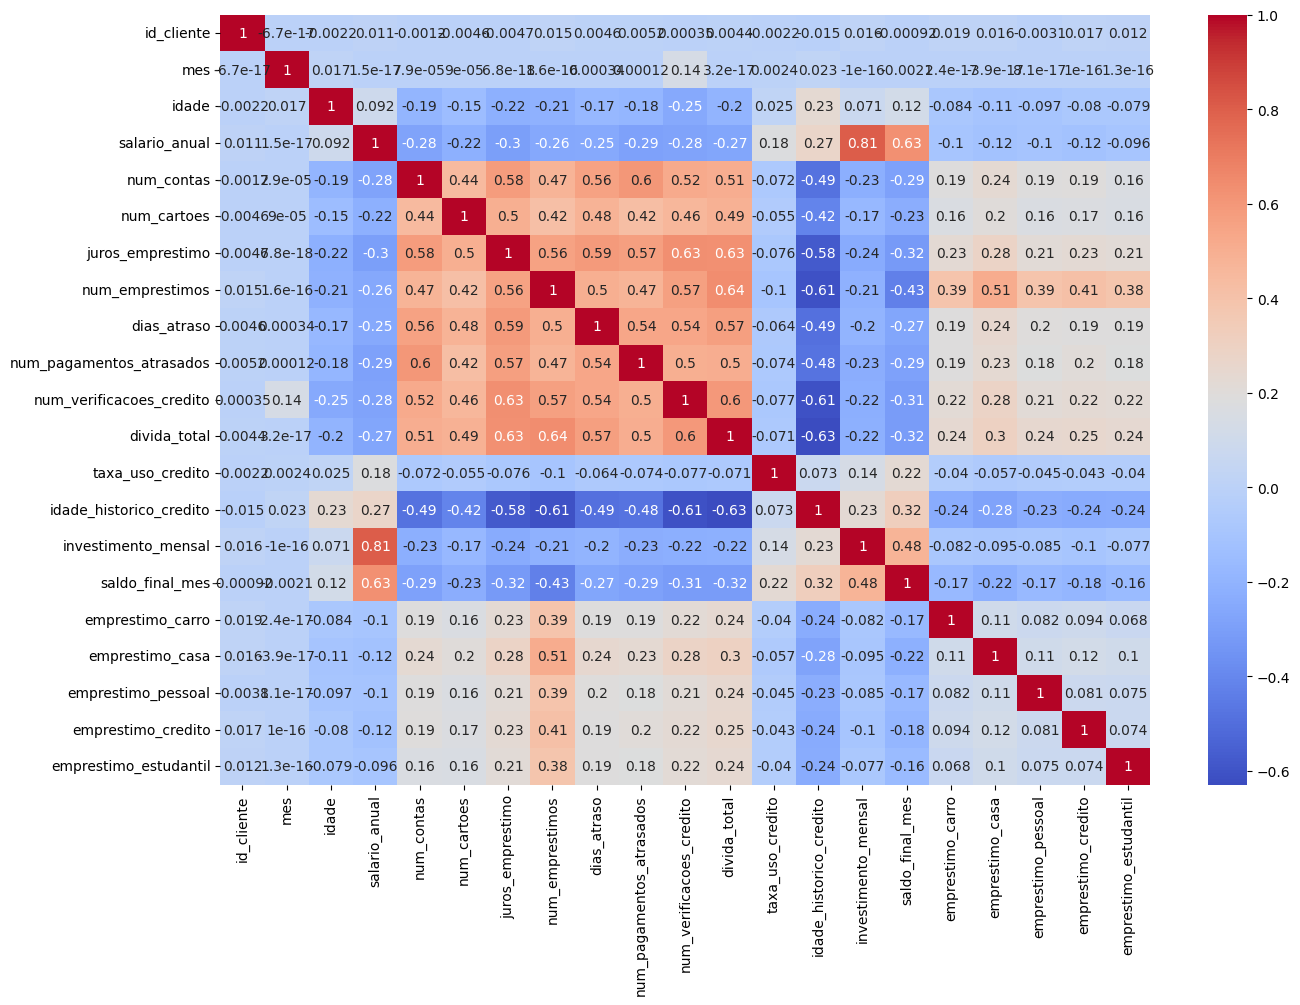

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(tabela.corr(numeric_only=True), annot=True, cmap='coolwarm',)

#### - For outlier treatment, we will apply the <b>Interquartile Range</b> method from Descriptive Statistics

### Defining functions to set lower and upper limits for analyzing each feature (column)

In [ ]:
def limites (coluna):
    """
    Calculates the lower and upper limits for the specified column.
    Uses the IQR (Interquartile Range) method to detect outliers.
    """
    Q1 = tabela[coluna].quantile(0.25)
    Q3 = tabela[coluna].quantile(0.75)
    IQR = Q3 - Q1 # interquartile range
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return float(limite_inferior), float(limite_superior)

def remove_outliers(coluna):
    '''This function removes outliers from the specified column. Uses the limits calculated by the limites() function.'''
    
    qtd_linhas_inicial = tabela.shape[0] # gets the number of rows in the dataframe before removing outliers
    limite_inferior, limite_superior = limites(coluna) # calculates lower and upper limits for the specified column
    tabela.drop(tabela[(tabela[coluna] < limite_inferior) | (tabela[coluna] > limite_superior)].index, inplace=True)
    # Updates the dataframe by removing rows that are outside the calculated limits
    qtd_linhas_final = tabela.shape[0] # calculates the number of rows in the dataframe after removing outliers
    linhas_removidas = qtd_linhas_inicial - qtd_linhas_final # calculates the number of rows removed
    return tabela, linhas_removidas

### Defining function to plot and analyze graphs for each feature (column)

In [ ]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=tabela[coluna], ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=tabela[coluna], ax=ax2)
    """
    Plots a box plot for the specified column.
    """  

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(tabela[coluna], kde=True, bins=50)
    """
    Plots a histogram for the specified column.
    """

def barras(coluna):
    plt.figure(figsize=(15, 5))
    sns.barplot(x=tabela[coluna].value_counts().index, y=tabela[coluna].value_counts())
    """
    Plots a bar chart for the specified column.
    """

### Plotting graphs for each feature

C:\Users\igor_\AppData\Local\Temp\ipykernel_1164\3275049450.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 5))


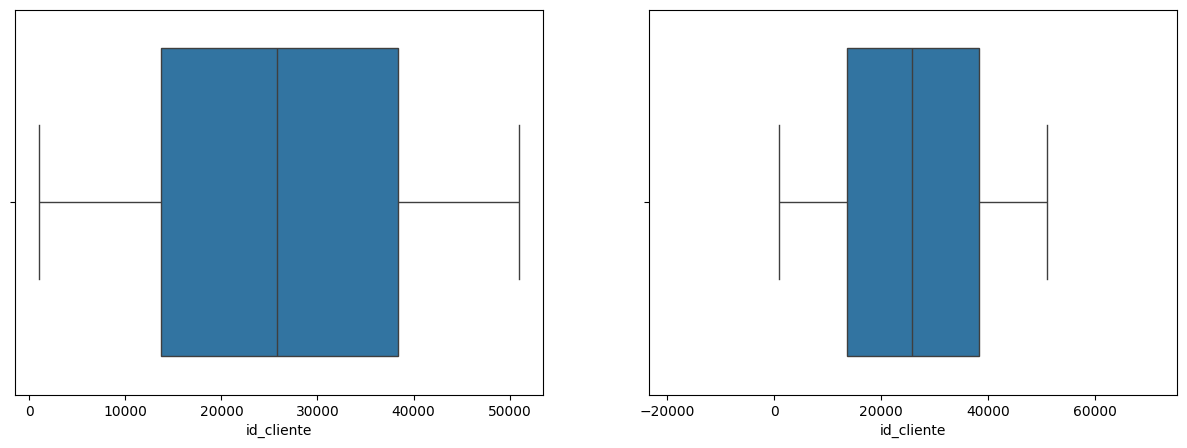

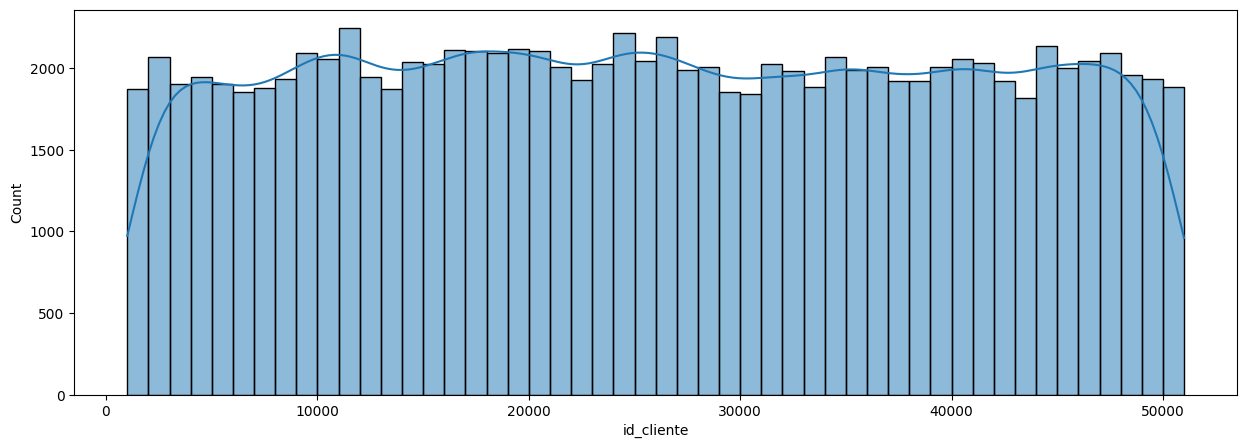

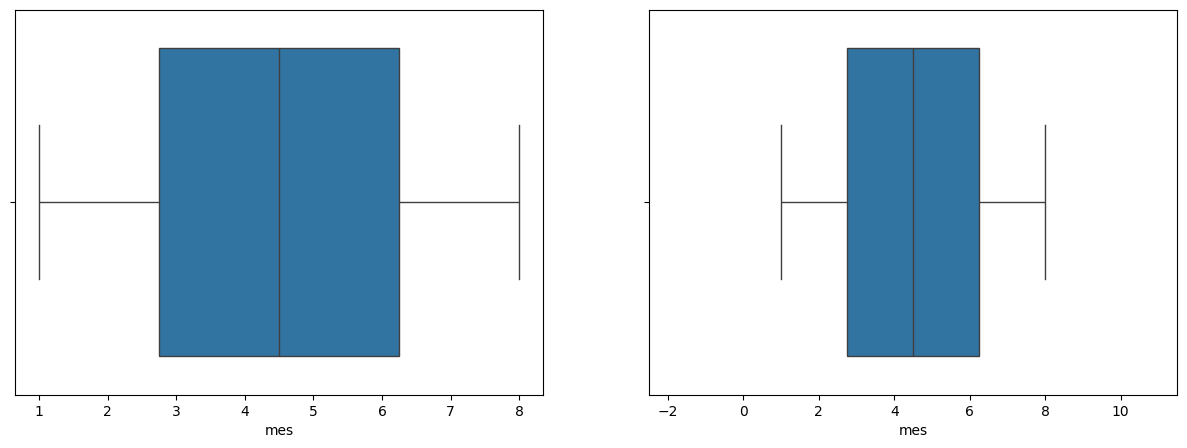

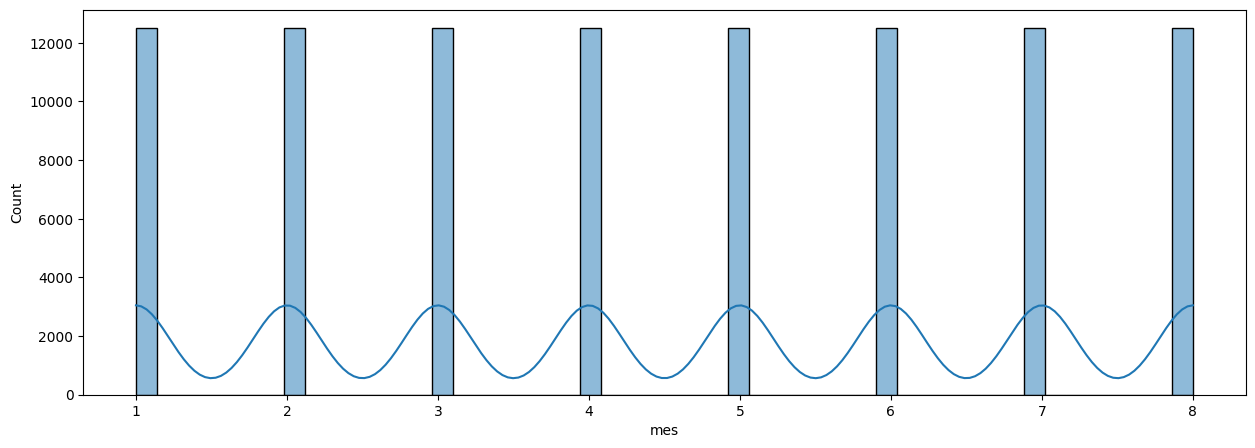

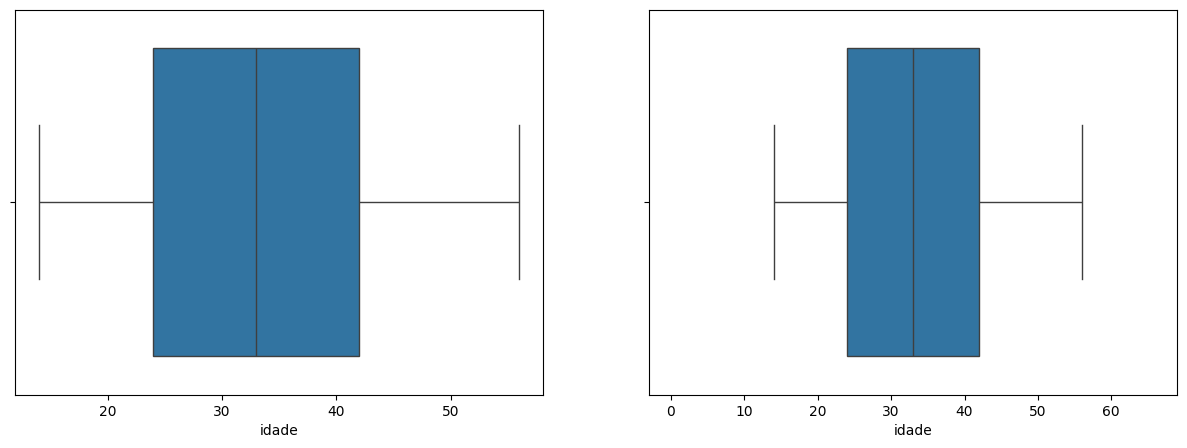

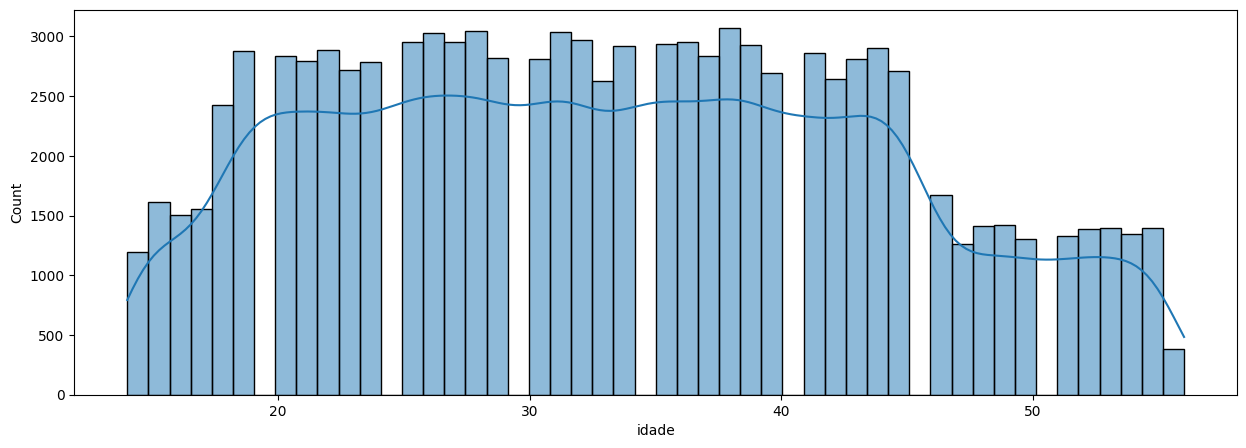

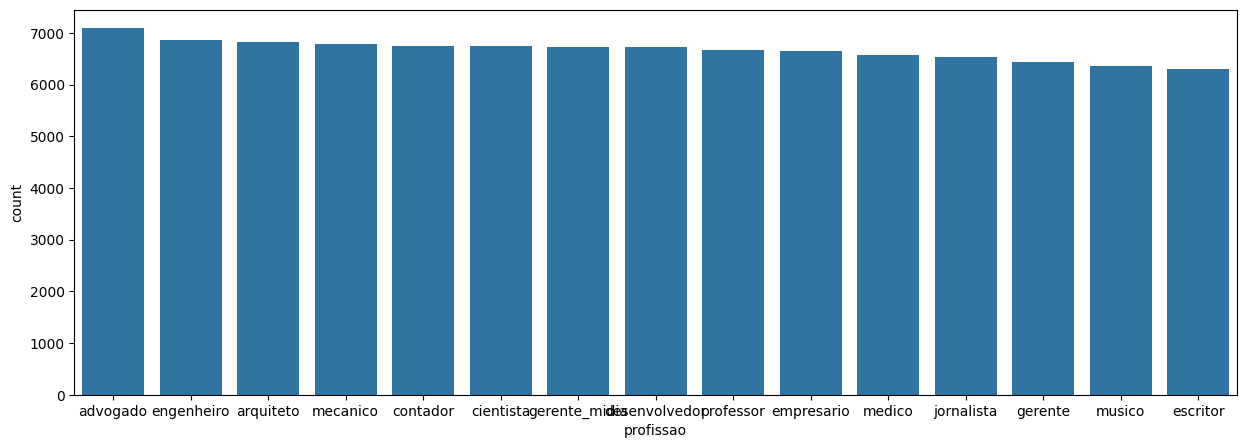

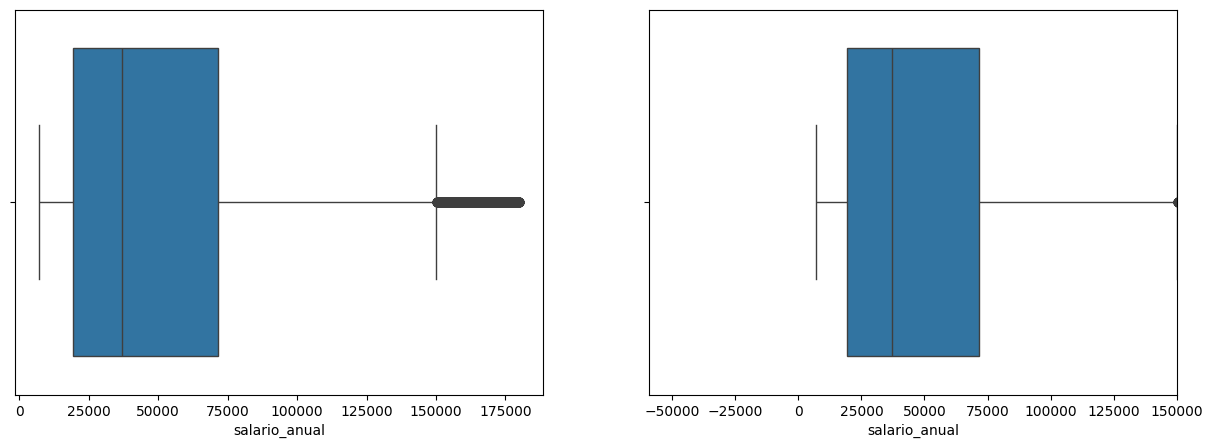

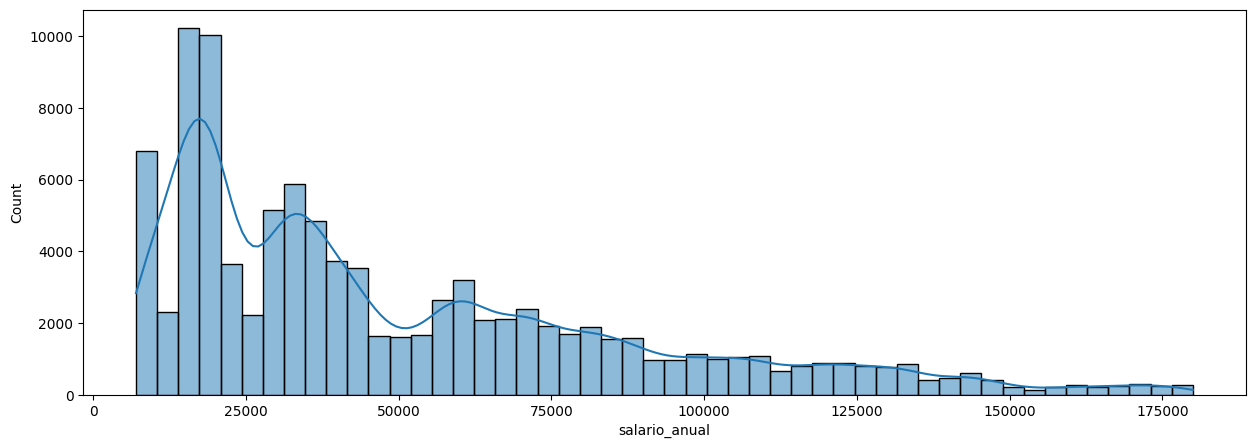

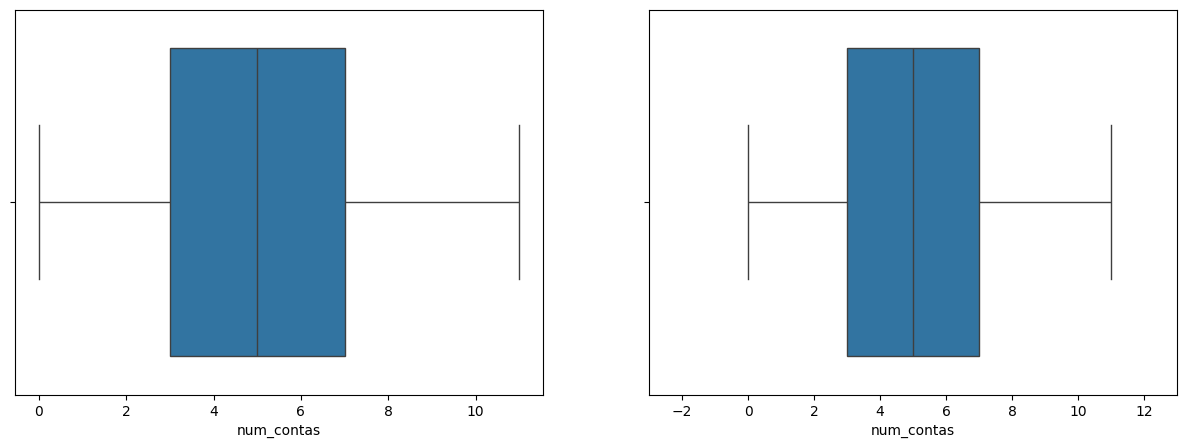

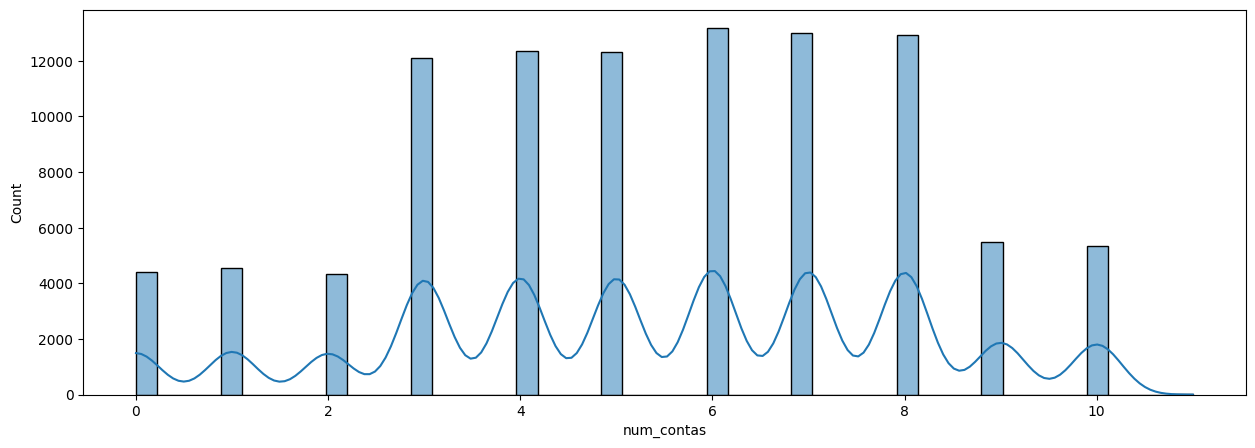

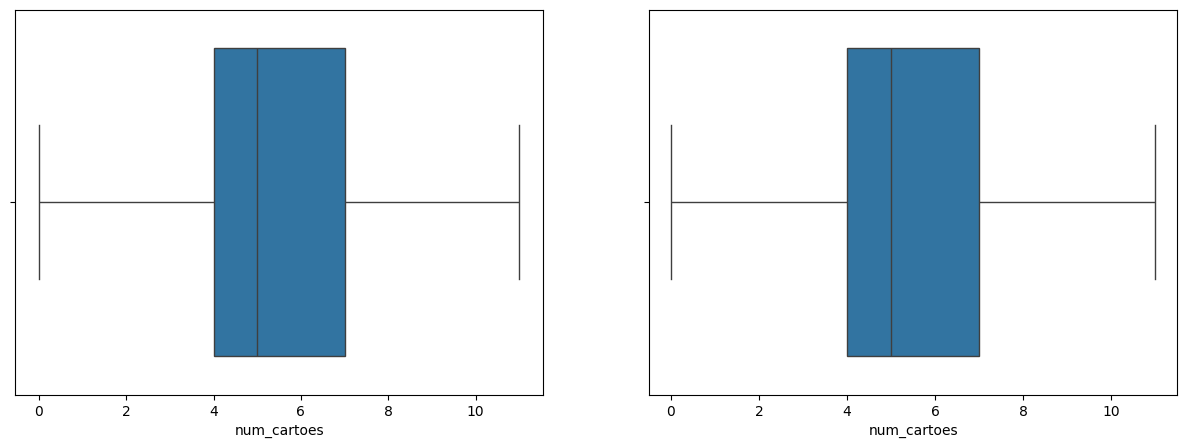

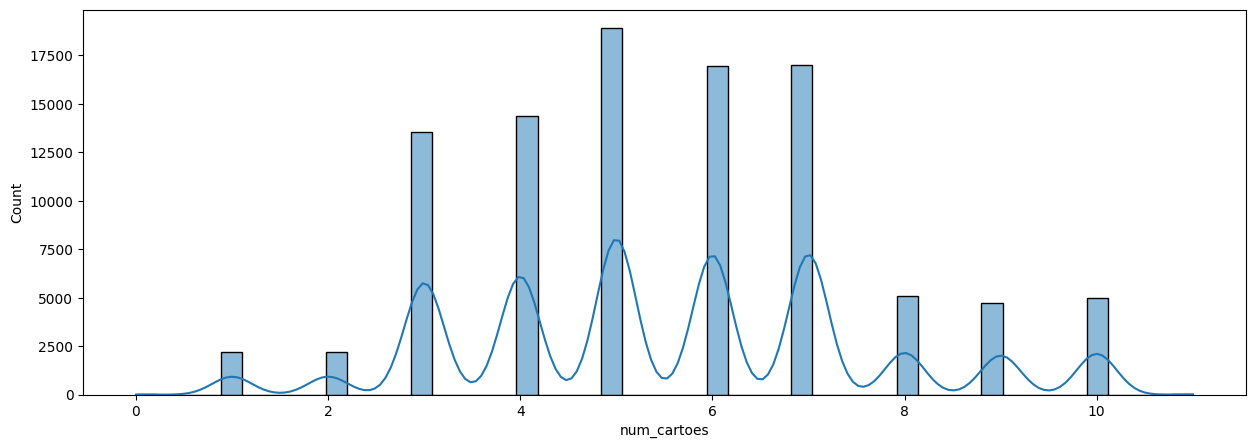

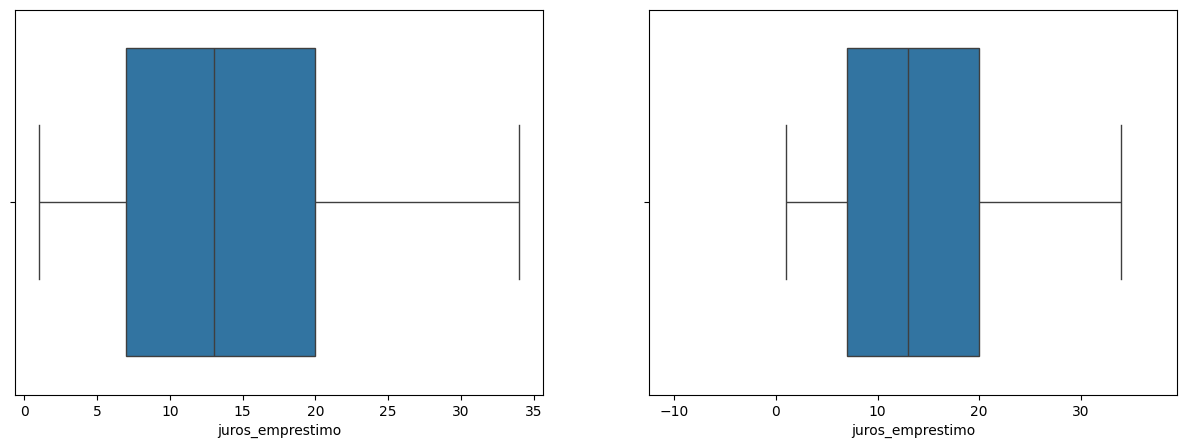

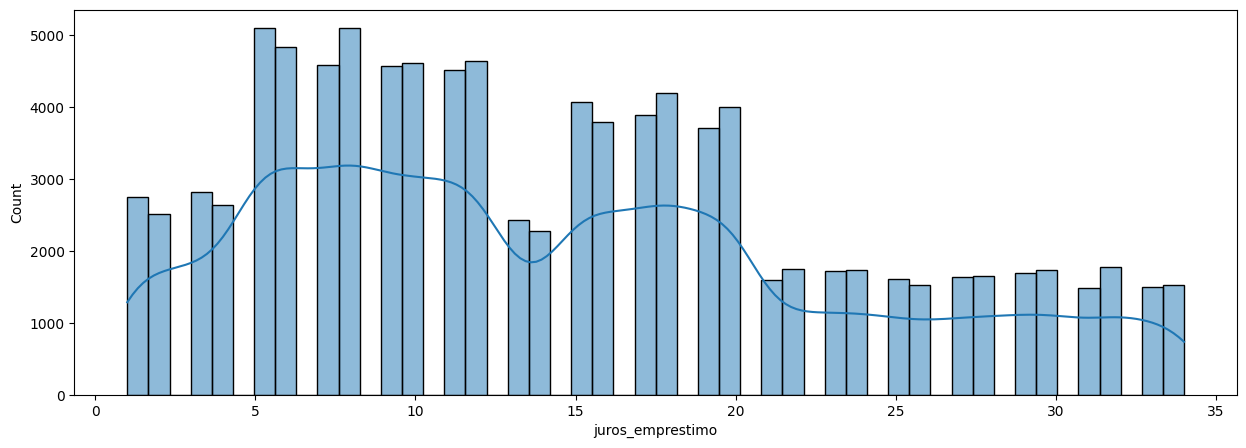

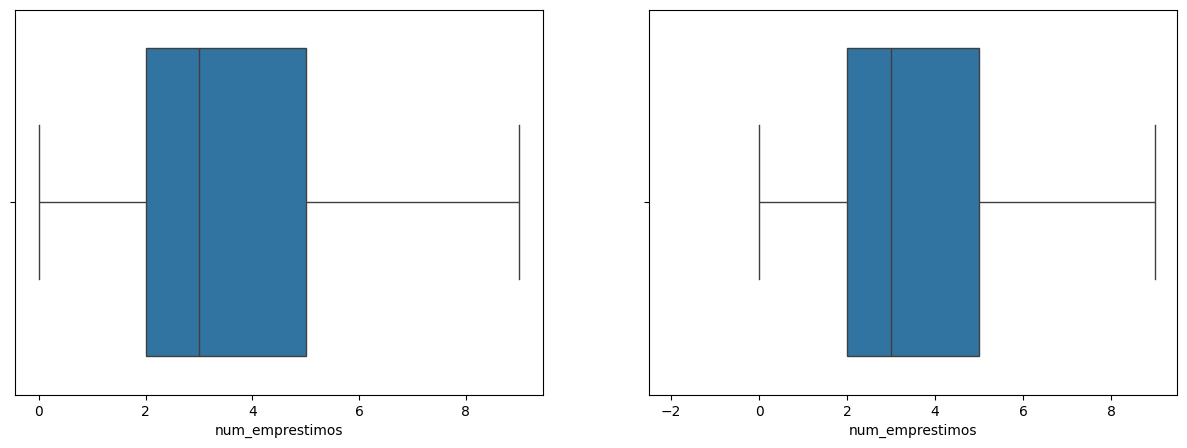

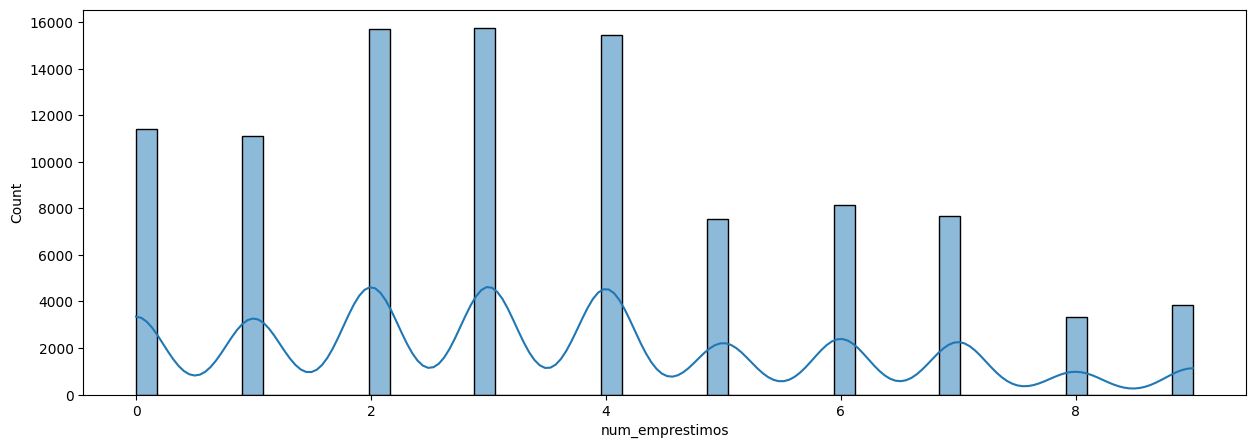

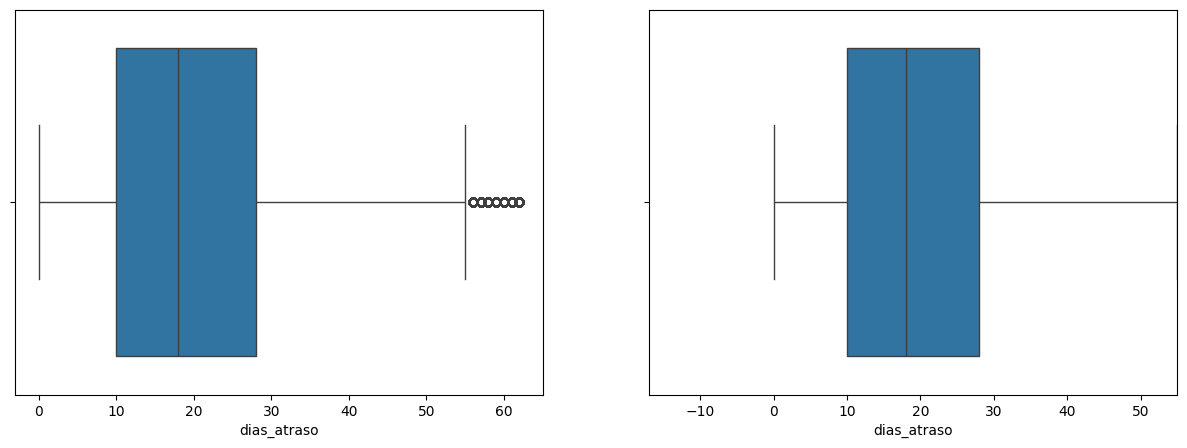

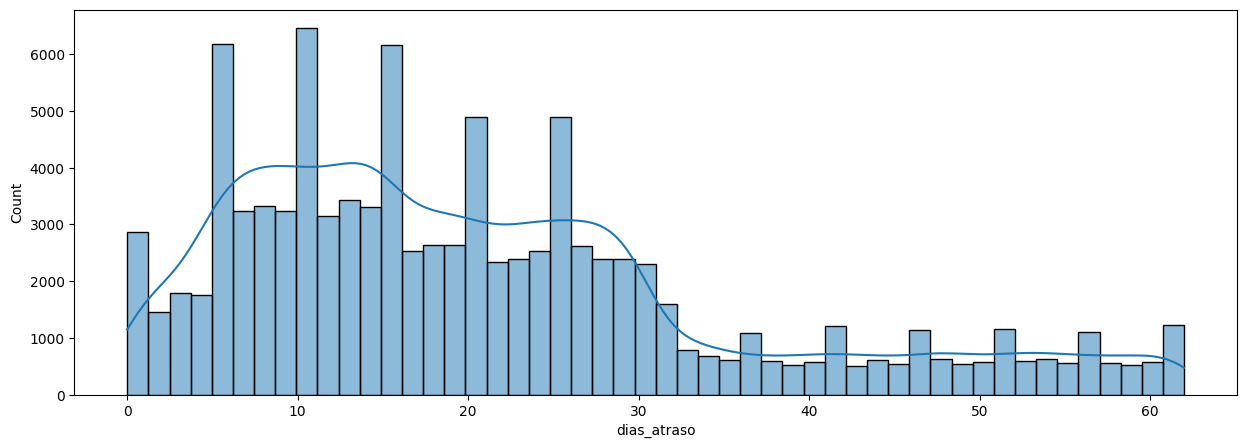

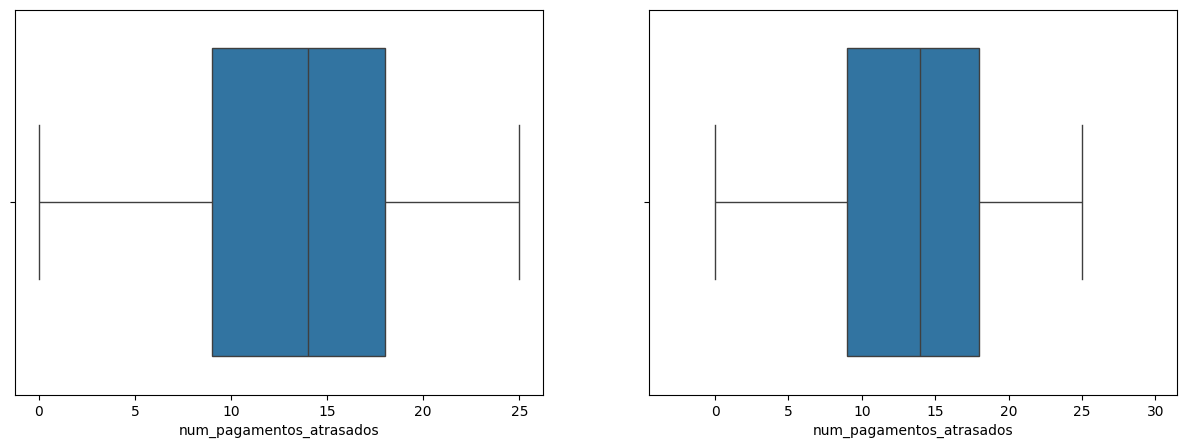

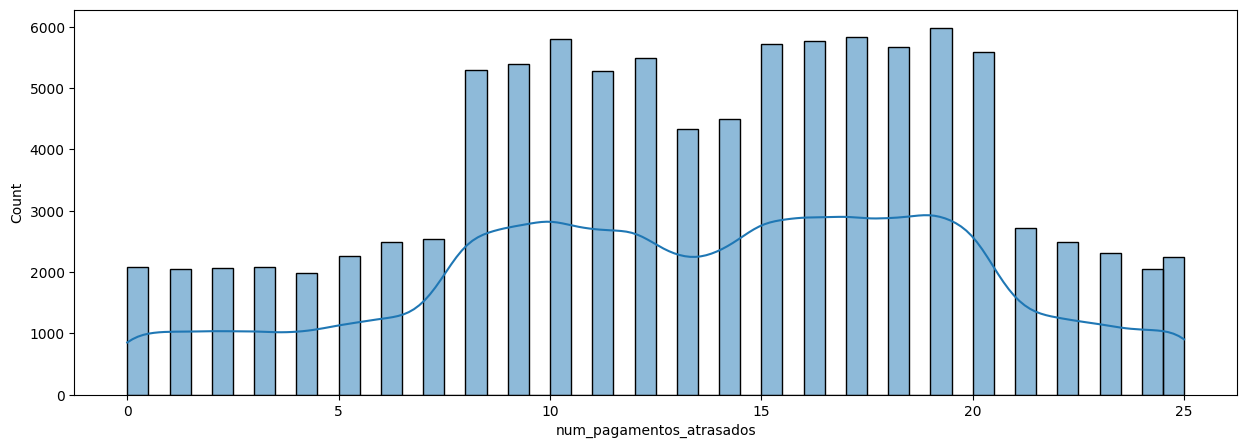

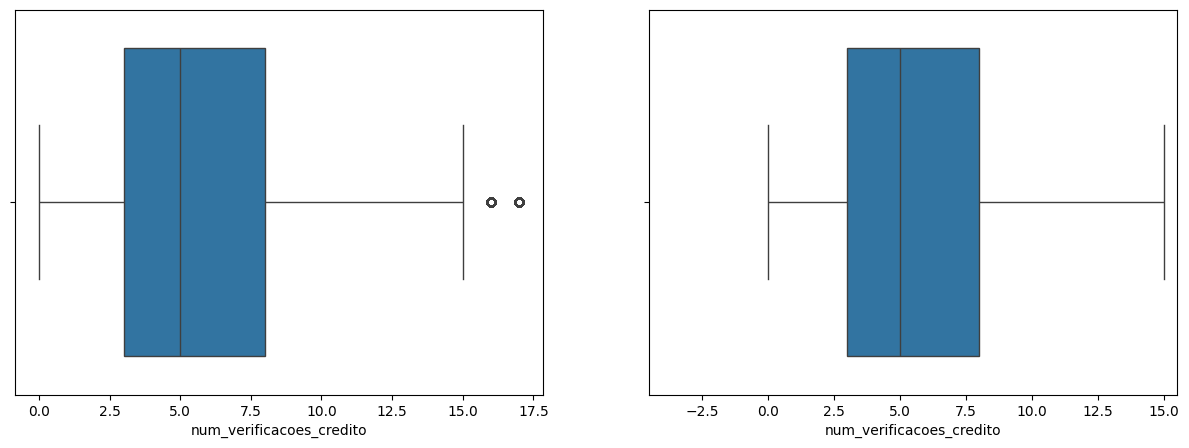

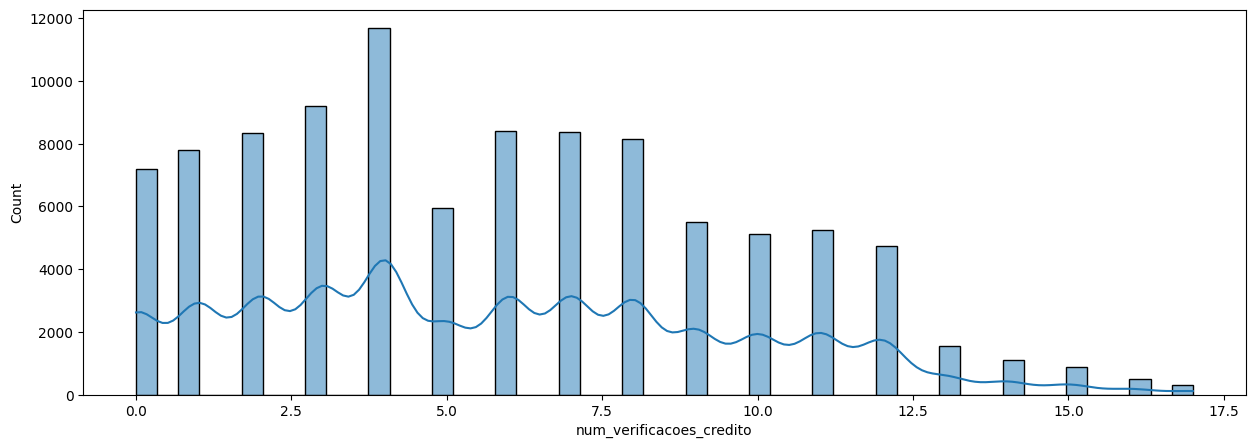

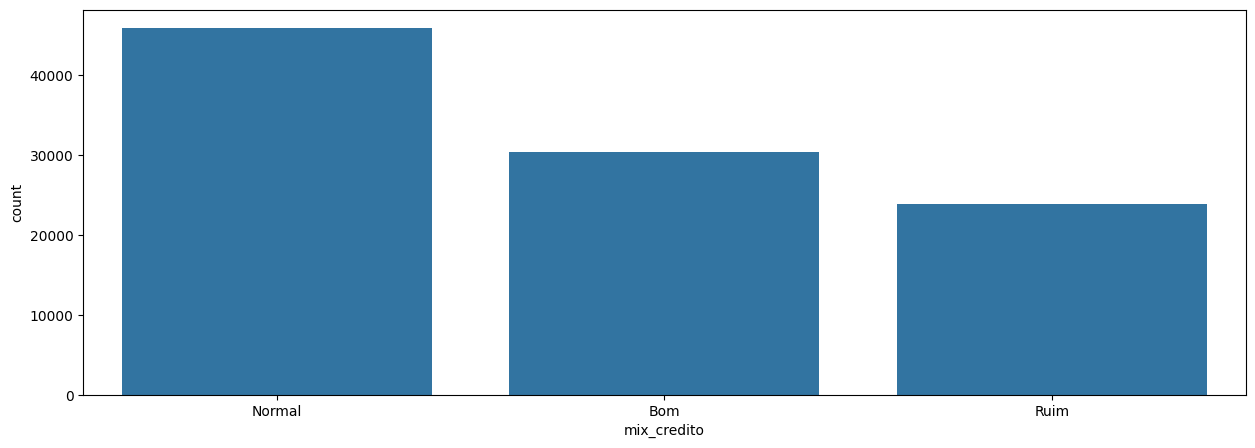

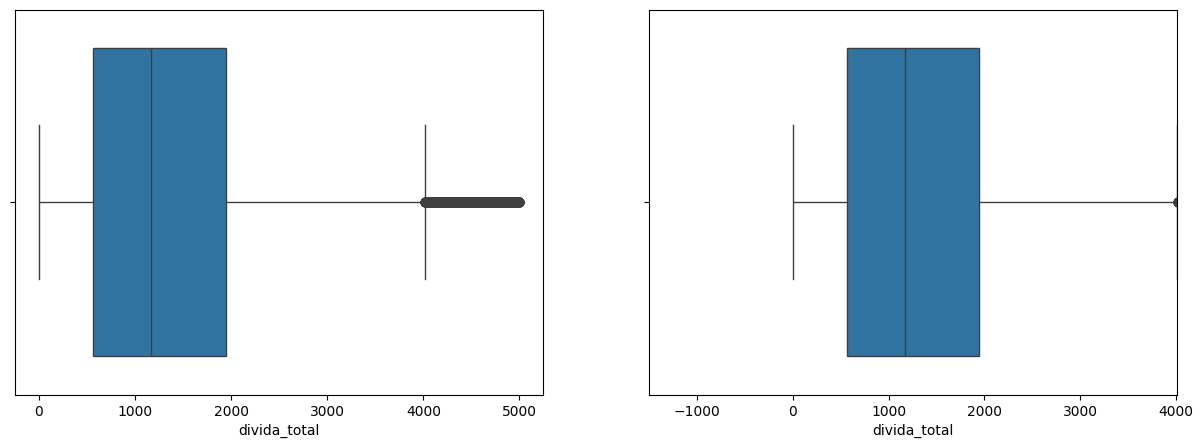

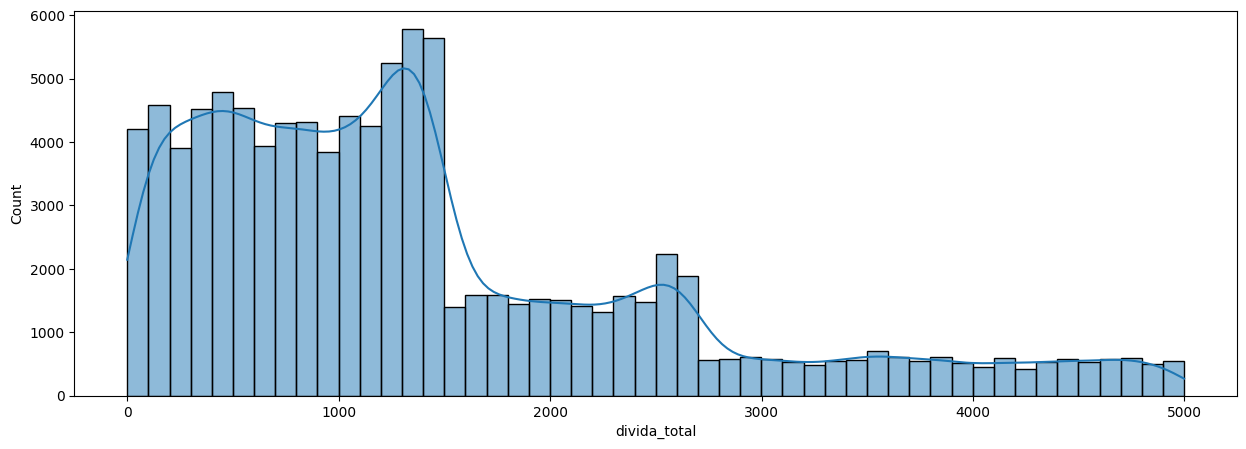

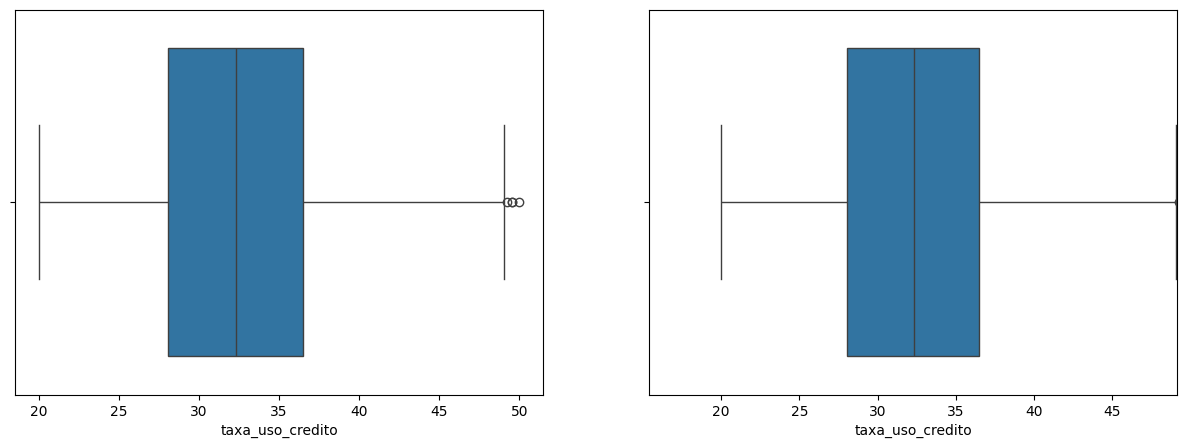

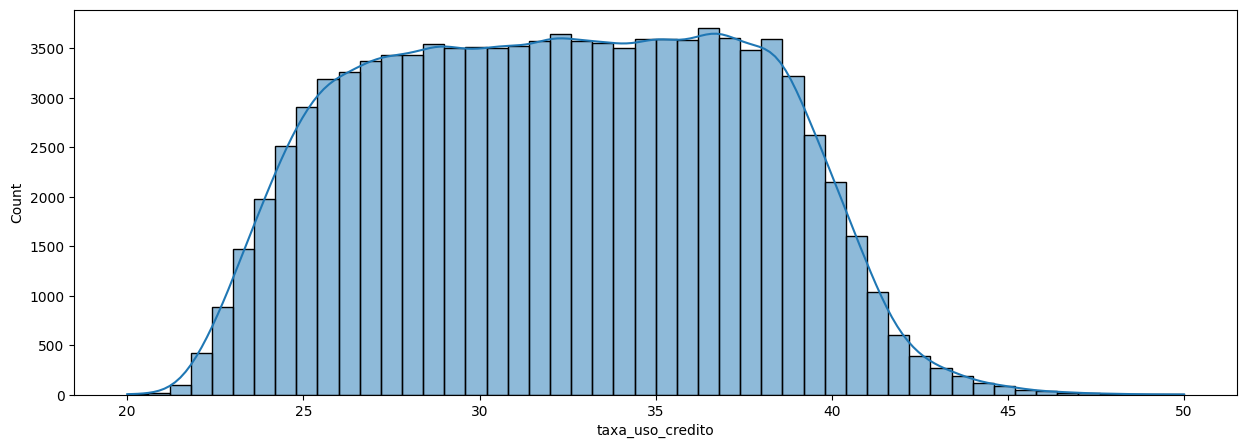

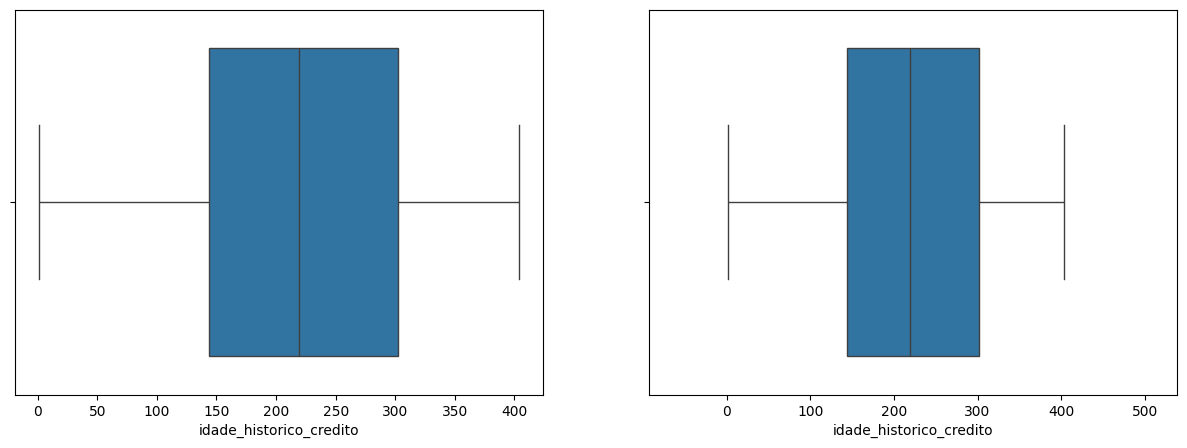

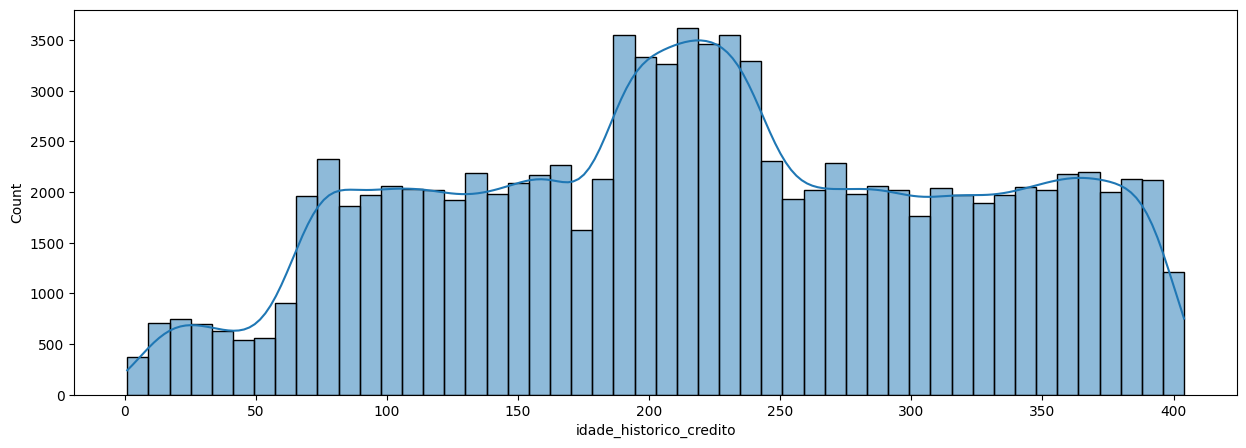

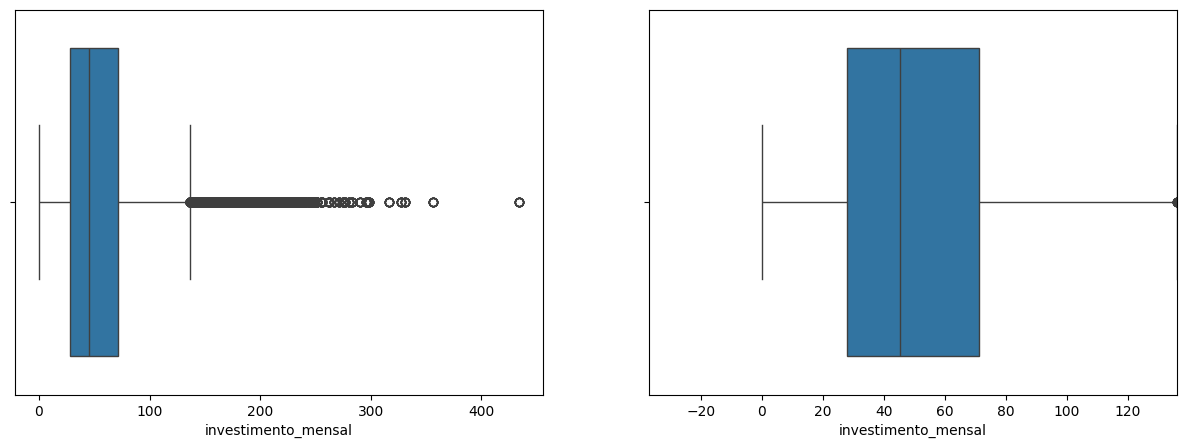

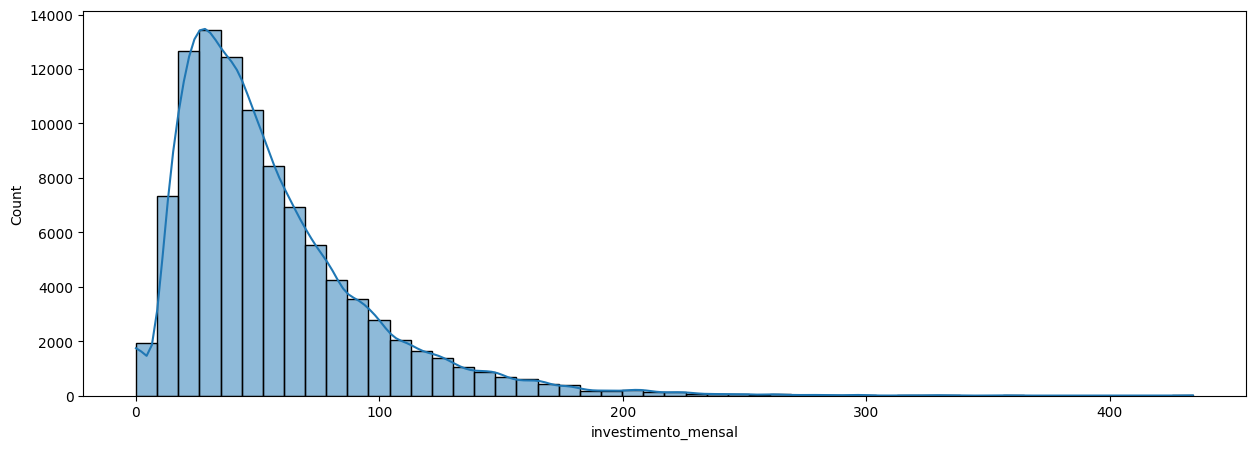

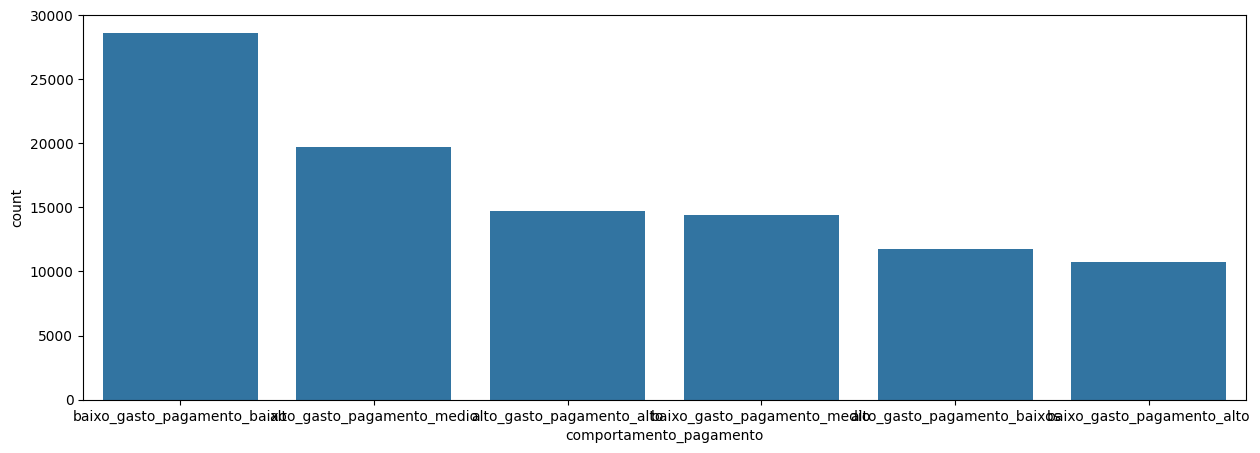

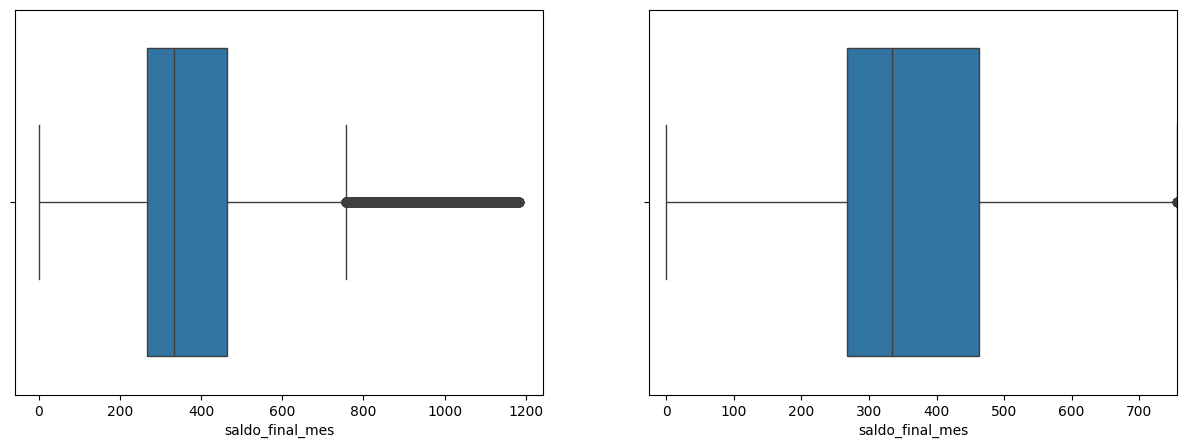

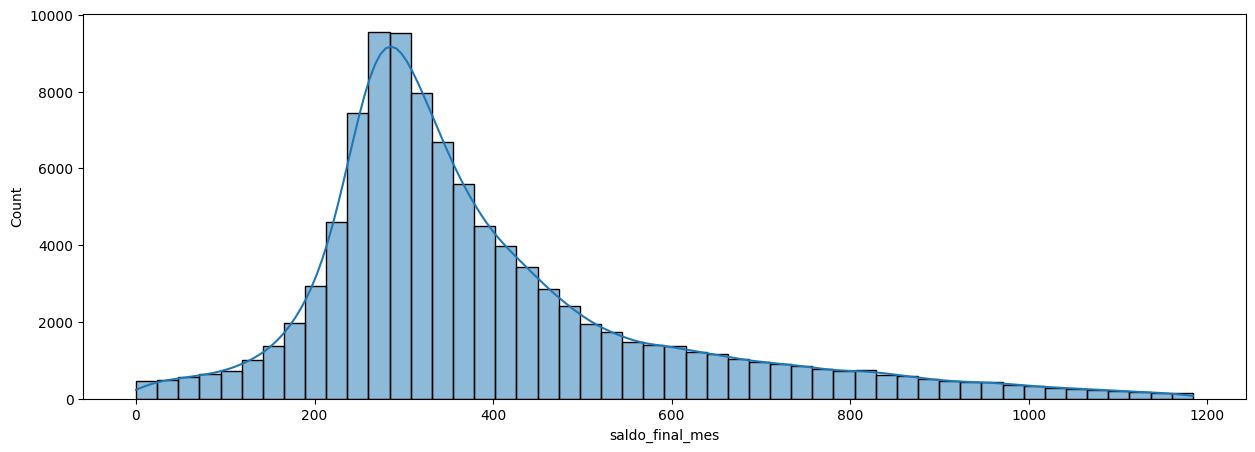

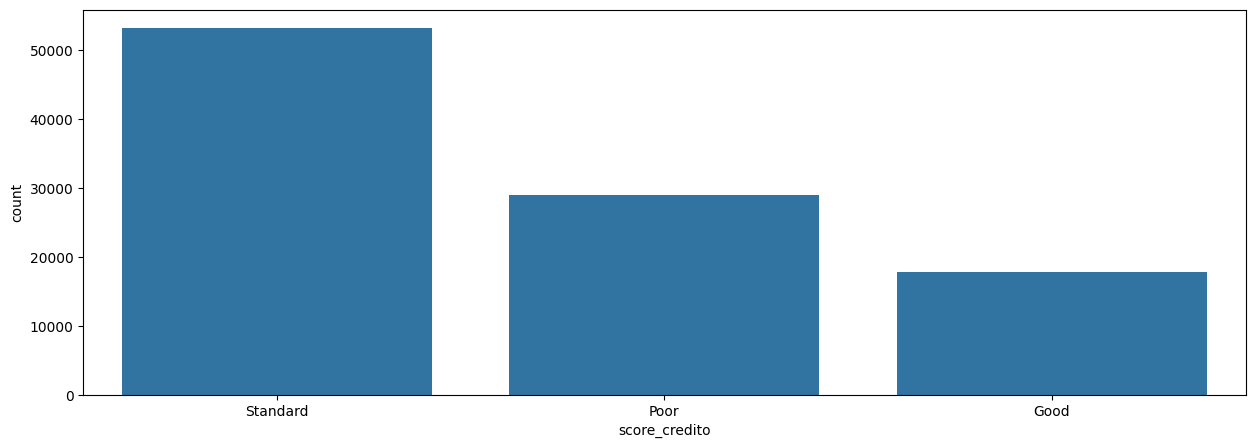

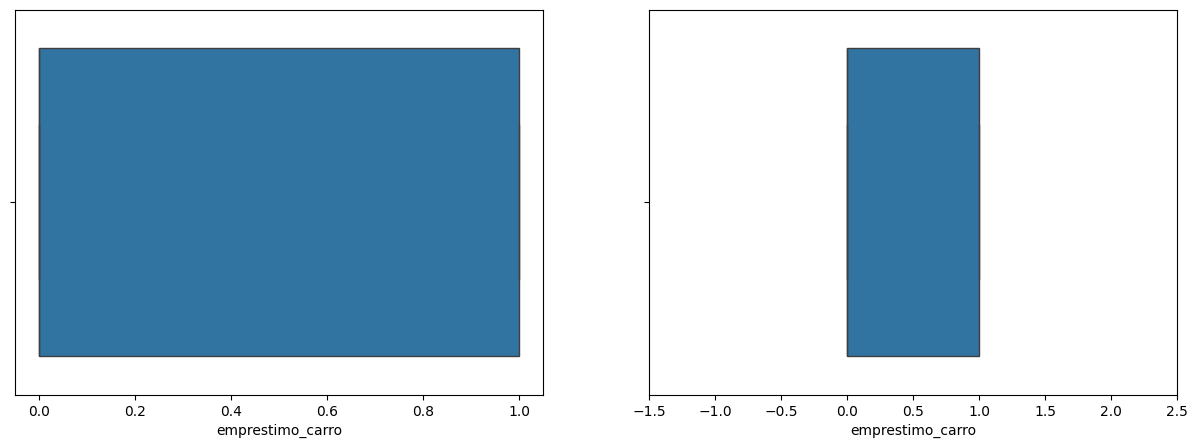

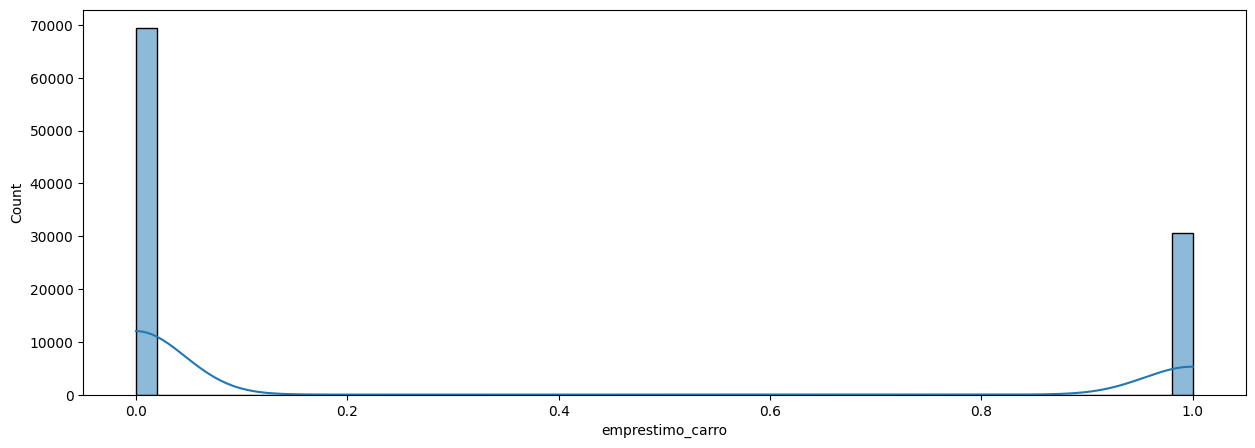

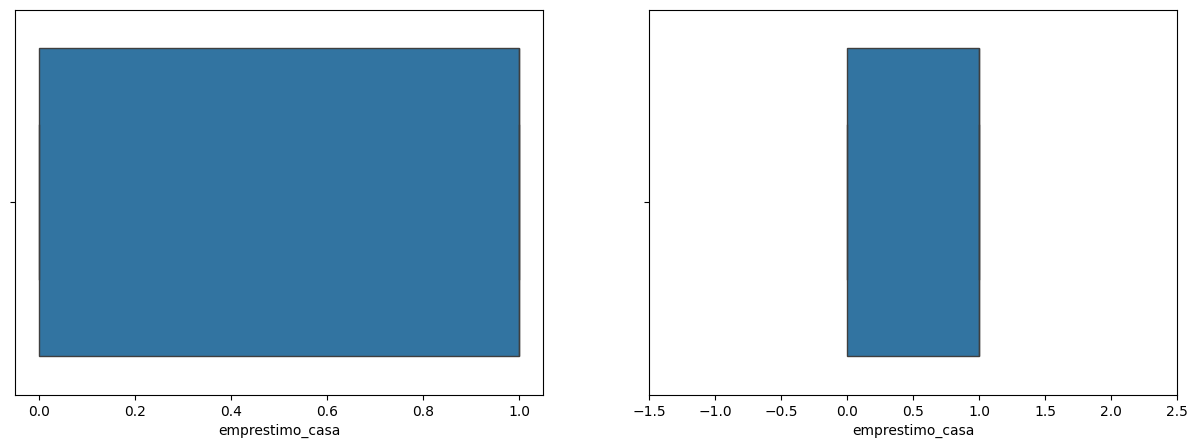

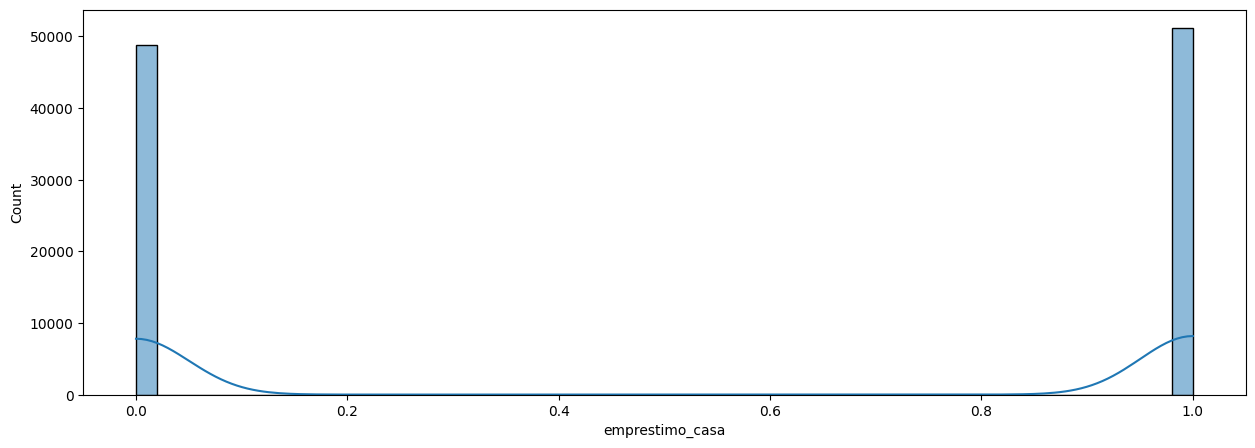

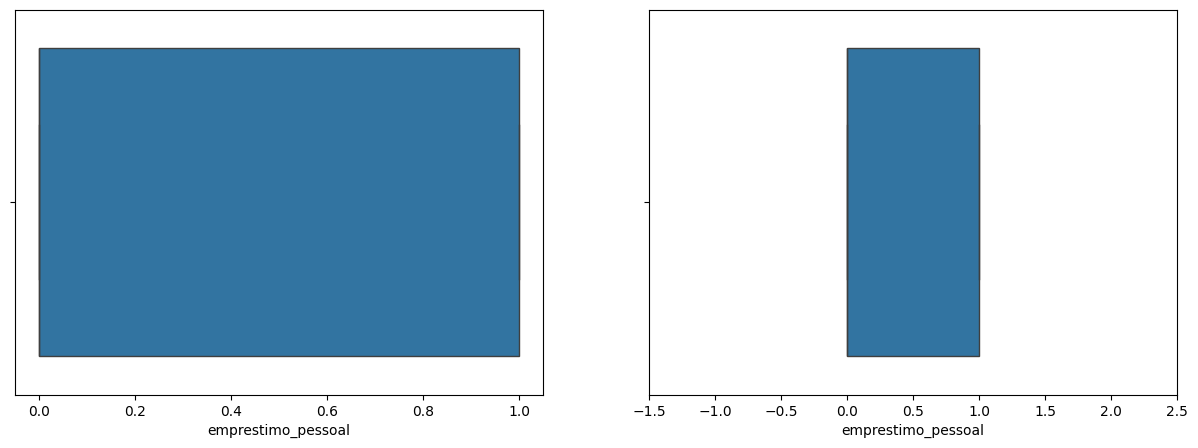

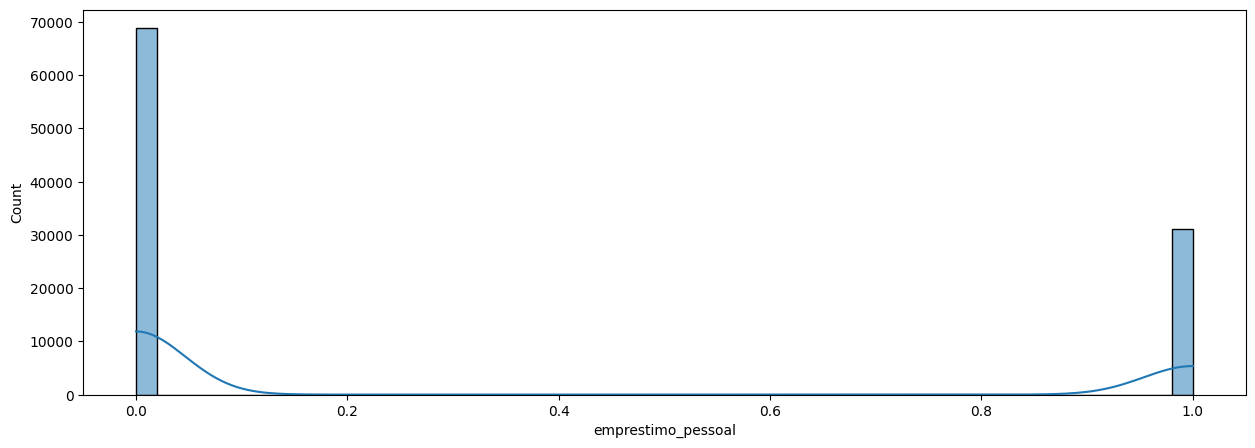

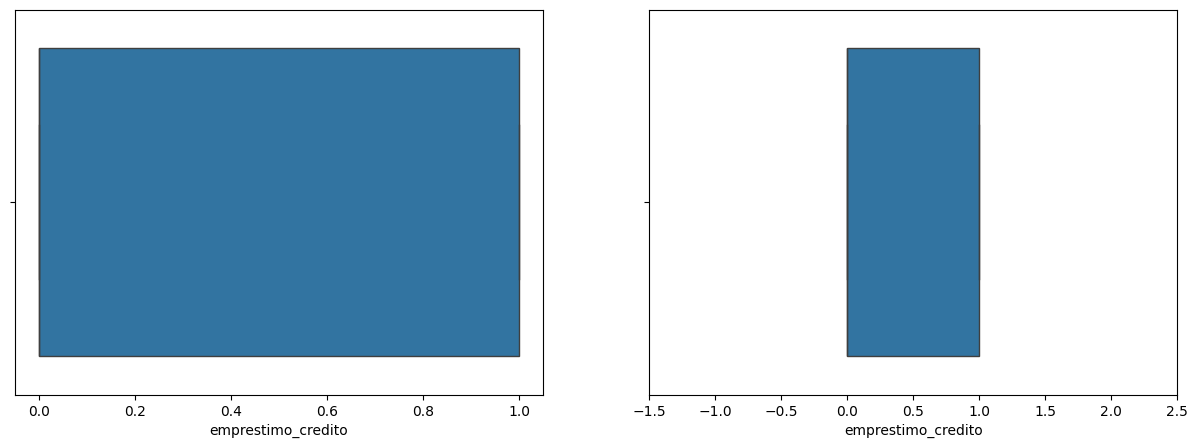

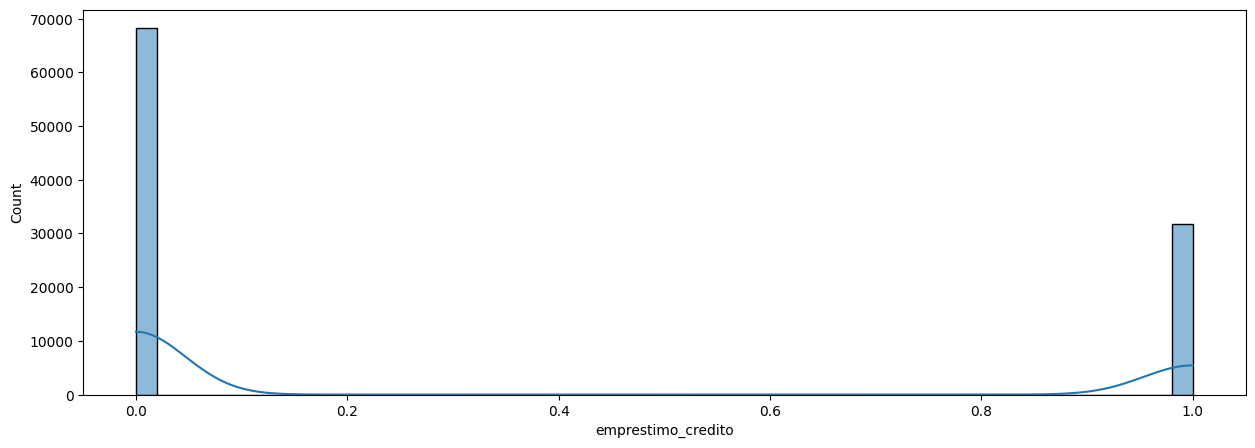

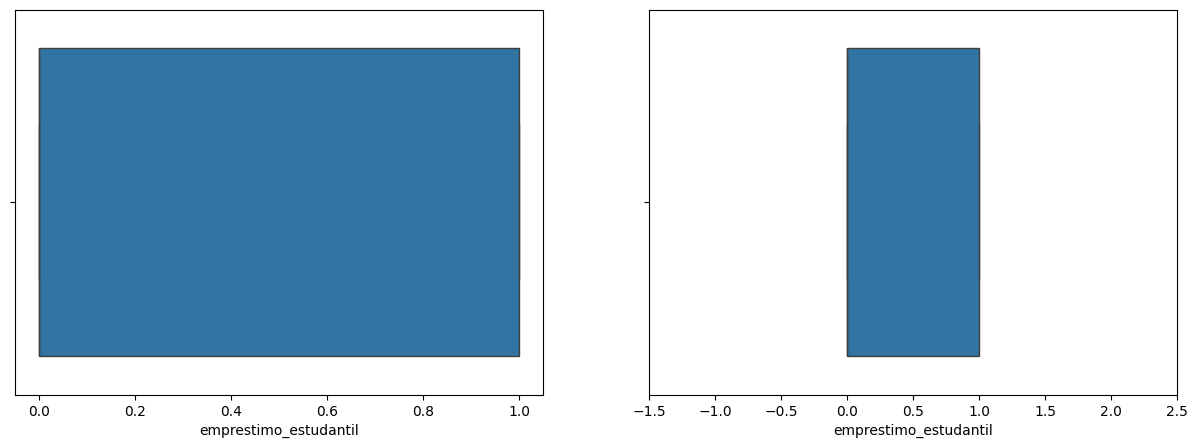

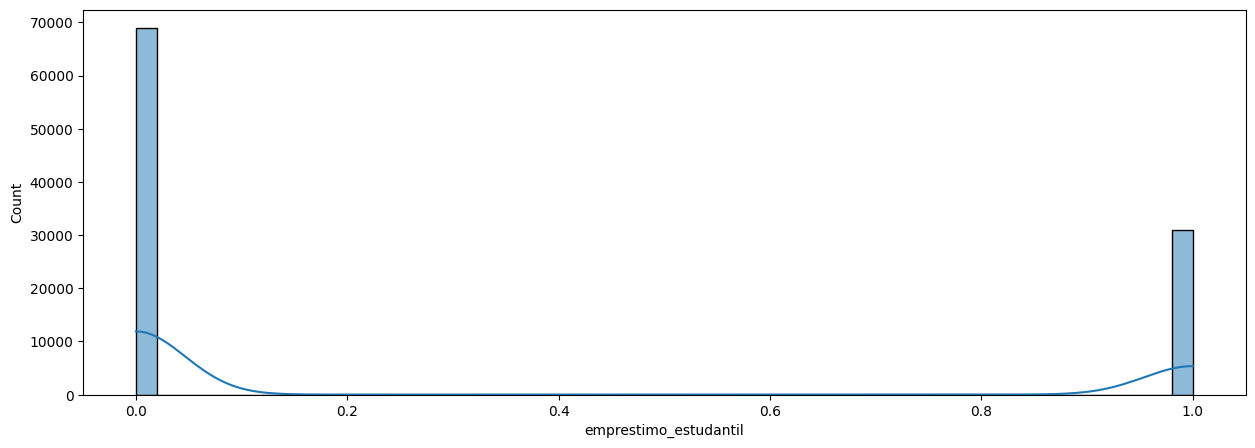

In [6]:
for col in tabela.columns:
    if tabela[col].dtype == 'object':
        barras(col)
    else:
        diagrama_caixa(col)
        histograma(col)

In [7]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

<b>[Decision]</b> - Remove outliers.

#### - Removing outliers from the 'annual_salary' column

In [ ]:
tabela, linhas_removidas = remove_outliers('salario_anual')
print(f"{linhas_removidas} rows were removed from the dataframe due to outliers in the feature (column).")

2000 linhas foram removidas do dataframe devido a outliers da feature(coluna).


#### - Removing outliers from the 'days_late' column

In [ ]:
tabela, linhas_removidas = remove_outliers('dias_atraso')
print(f"{linhas_removidas} rows were removed from the dataframe due to outliers in the feature (column).")

4002 linhas foram removidas do dataframe devido a outliers da feature(coluna).


#### - Removing outliers from the 'credit_checks' column

In [ ]:
tabela, linhas_removidas = remove_outliers('num_verificacoes_credito')
print(f"{linhas_removidas} rows were removed from the dataframe due to outliers in the feature (column).")

665 linhas foram removidas do dataframe devido a outliers da feature(coluna).


#### - Removing outliers from the 'total_debt' column

In [ ]:
tabela, linhas_removidas = remove_outliers('divida_total')
print(f"{linhas_removidas} rows were removed from the dataframe due to outliers in the feature (column).")

5897 linhas foram removidas do dataframe devido a outliers da feature(coluna).


#### - Removing outliers from the 'credit_usage_rate' column

In [ ]:
tabela, linhas_removidas = remove_outliers('taxa_uso_credito')
print(f"{linhas_removidas} rows were removed from the dataframe due to outliers in the feature (column).")

#### - Removing outliers from the 'monthly_investment' column

In [ ]:
tabela, linhas_removidas = remove_outliers('investimento_mensal')
print(f"{linhas_removidas} rows were removed from the dataframe due to outliers in the feature (column).")

3422 linhas foram removidas do dataframe devido a outliers da feature(coluna).


#### - Removing outliers from the 'end_month_balance' column

In [13]:
tabela, linhas_removidas = remove_outliers('saldo_final_mes')
print(f"{linhas_removidas} linhas foram removidas do dataframe devido a outliers da feature(coluna).")

5658 linhas foram removidas do dataframe devido a outliers da feature(coluna).


#### - Removing ID_Cliente (Client_ID) column. Not relevant information for our model.

In [ ]:
tabela = tabela.drop('id_cliente', axis=1) # remove the 'id' column from the dataframe as it's not necessary for the AI
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 78356 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       78356 non-null  int64  
 1   idade                     78356 non-null  float64
 2   profissao                 78356 non-null  object 
 3   salario_anual             78356 non-null  float64
 4   num_contas                78356 non-null  float64
 5   num_cartoes               78356 non-null  float64
 6   juros_emprestimo          78356 non-null  float64
 7   num_emprestimos           78356 non-null  float64
 8   dias_atraso               78356 non-null  float64
 9   num_pagamentos_atrasados  78356 non-null  float64
 10  num_verificacoes_credito  78356 non-null  float64
 11  mix_credito               78356 non-null  object 
 12  divida_total              78356 non-null  float64
 13  taxa_uso_credito          78356 non-null  float64
 14  idade_histo

#### To prepare the database, we will use the Label Encoding process, which transforms categorical variables (nominal or ordinal) into integer numbers.

In [ ]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder transforms categories into numbers

codificador_profissao = LabelEncoder()
tabela["profissao"] = codificador_profissao.fit_transform(tabela["profissao"])


# credit_mix
codificador_credito = LabelEncoder()
tabela["mix_credito"] = codificador_credito.fit_transform(tabela["mix_credito"])

# payment_behavior
codificador_pagamento = LabelEncoder()
tabela["comportamento_pagamento"] = codificador_pagamento.fit_transform(tabela["comportamento_pagamento"])


display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 78356 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       78356 non-null  int64  
 1   idade                     78356 non-null  float64
 2   profissao                 78356 non-null  int64  
 3   salario_anual             78356 non-null  float64
 4   num_contas                78356 non-null  float64
 5   num_cartoes               78356 non-null  float64
 6   juros_emprestimo          78356 non-null  float64
 7   num_emprestimos           78356 non-null  float64
 8   dias_atraso               78356 non-null  float64
 9   num_pagamentos_atrasados  78356 non-null  float64
 10  num_verificacoes_credito  78356 non-null  float64
 11  mix_credito               78356 non-null  int64  
 12  divida_total              78356 non-null  float64
 13  taxa_uso_credito          78356 non-null  float64
 14  idade_histo

None

#### Creating a model to predict customer credit scores

Splitting the database to train the models

In [16]:
x = tabela.drop('score_credito', axis=1)
y = tabela['score_credito']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the database into training and testing sets
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=27)

Considering that we have a classification problem, we will use the <b>Random Forest Classifier</b> and <b>K-nearest Neighbors Classifier</b> models

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

rfc_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

rfc_model.fit(x_treino, y_treino)
knn_model.fit(x_treino, y_treino)

KNeighborsClassifier()

<b>[Decision]</b> - For evaluating the classification models' performance, we will use the Accuracy metric.

In [ ]:
from sklearn.metrics import accuracy_score

y_rfc_pred = rfc_model.predict(x_teste)
y_knn_pred = knn_model.predict(x_teste)

print("Random Forest model accuracy: ", accuracy_score(y_teste, y_rfc_pred))
print("KNN model accuracy: ", accuracy_score(y_teste, y_knn_pred))

Acuracia do modelo Random Forest:  0.8363323124042878
Acuracia do modelo KNN:  0.7544027565084227


### Best Model - Random Forest Classifier

According to the metric used for model evaluation:

- Random Forest: 83.63% accuracy
- KNN Model: 75.44% accuracy

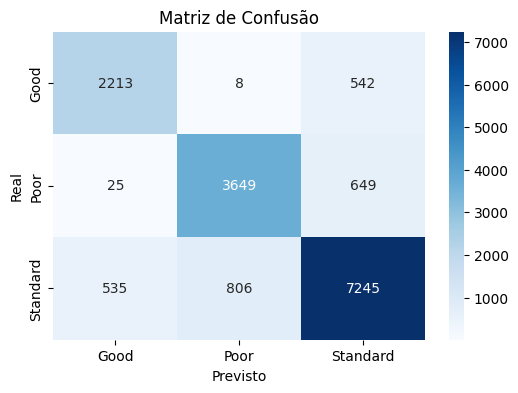

Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.80      0.80      0.80      2763
        Poor       0.82      0.84      0.83      4323
    Standard       0.86      0.84      0.85      8586

    accuracy                           0.84     15672
   macro avg       0.82      0.83      0.83     15672
weighted avg       0.84      0.84      0.84     15672



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Good', 'Poor', 'Standard']
# Confusion Matrix
cm = confusion_matrix(y_teste, y_rfc_pred)

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_teste, y_rfc_pred)
print("Classification Report:")
print(report)

### Class-by-Class Analysis
<b>Good Class</b> (lowest score)
- Correct predictions (TP): 2,213
- Errors as Standard: 542
- Errors as Poor: 8

<b>Conclusion</b>: the model frequently confuses the Good class with the Standard class, which can be critical.

<b>Poor Class</b> (intermediate score)
- Correct predictions (TP): 3,649
- Errors as Good: 25
- Errors as Standard: 649

<b>Conclusion</b>: performance here is reasonable, but there is still a considerable number of Poor class examples being classified as Standard.

<b>Standard Class</b> (highest score)
- Correct predictions (TP): 7,245
- Errors as Good: 535
- Errors as Poor: 806

<b>Conclusion</b>: most Standard class examples are being correctly identified, but there are notable errors — especially 806 being confused with Poor class.

### Feature Importance for the Model

Text(0.5, 1.0, 'Importância de cada coluna no modelo Random Forest Classifier')

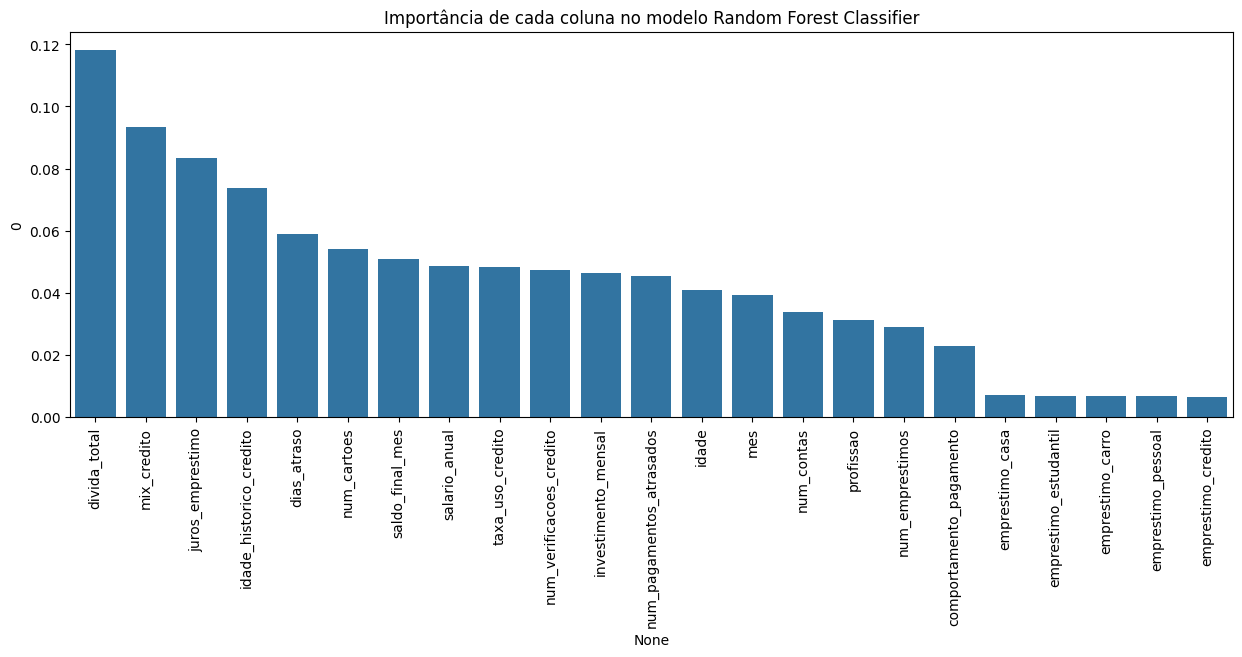

In [ ]:
df_importancia_cada_coluna = pd.DataFrame(rfc_model.feature_importances_, index=x_treino.columns)
# Creates a DataFrame with the feature importances from the Random Forest Classifier model
df_importancia_cada_coluna = df_importancia_cada_coluna.sort_values(by=0, ascending=False)  
plt.figure(figsize=(15, 5))
barras_features_importances = sns.barplot(x=df_importancia_cada_coluna.index, y=df_importancia_cada_coluna[0])
barras_features_importances.tick_params(axis='x', rotation=90)  # Rotates x-axis labels for better readability
plt.title('Feature Importance in the Random Forest Classifier Model')

## Final Considerations

- As expected, the debt level variable (total_debt) has a strong influence on credit score prediction. The credit_mix variable, which refers to the variety of credit account types an individual has, the loan_interest variable - the rate charged on the taken loan, the credit_history_age variable - How long your credit accounts have been open, i.e., how long you've maintained accounts like credit cards, loans and financing, and late_payments_num - Number of recent late occurrences form the top 5 features that had the greatest impact on credit score prediction.

- As expected, Random Forest Classifier showed good performance.

- We plan to apply the model without excluding outliers to consider its robustness against them (project: 'prev_score_cliente_sem_tirar_outliers.ipynb').

### Making Predictions with New Dataset:

In [ ]:
novos_clientes = pd.read_csv("novos_clientes.csv")

codificador_profissao = LabelEncoder()
novos_clientes["profissao"] = codificador_profissao.fit_transform(novos_clientes["profissao"])


# credit_mix
codificador_credito = LabelEncoder()
novos_clientes["mix_credito"] = codificador_credito.fit_transform(novos_clientes["mix_credito"])

# payment_behavior
codificador_pagamento = LabelEncoder()
novos_clientes["comportamento_pagamento"] = codificador_pagamento.fit_transform(novos_clientes["comportamento_pagamento"])


nova_previsao_rfc = rfc_model.predict(novos_clientes)
print(f"Random Forest Prediction: {nova_previsao_rfc}")

Previsao Random Forest: ['Poor' 'Good' 'Standard']
